<a href="https://colab.research.google.com/github/HusseinAndia/Telco_Customer_Churn/blob/master/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get Data from kaggle and grab it from my drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [8]:
! kaggle datasets download -d blastchar/telco-customer-churn

  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 11.4MB/s]


In [9]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


# **1- Data Manipulation** 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
df = pd.read_csv("/content/gdrive/My Drive/Kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
#Convert "TotalCharges" to numeric and drop nan values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
print('Mising Vaues:',df["TotalCharges"].isnull().sum())

Mising Vaues: 11


In [13]:
#replace 'No internet service' to No for the following columns
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in cols:
    df[i] = df[i].replace({'No internet service' : 'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service' : 'No'})
df.dropna(inplace=True)
print ("Unique values :  \n",df.nunique())

Unique values :  
 customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          2
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64


In [14]:
churn = df[df["Churn"] == 'Yes']
no_churn = df[df["Churn"] == 'No']

churn_MonthlyCharge = churn.groupby('PaymentMethod')['MonthlyCharges'].sum().round(2)
no_churn_MonthlyCharge = no_churn.groupby('PaymentMethod')['MonthlyCharges'].sum().round(2)

print(no_churn_MonthlyCharge,'\n',churn_MonthlyCharge)

PaymentMethod
Bank transfer (automatic)    83539.10
Credit card (automatic)      83229.20
Electronic check             96056.25
Mailed check                 53705.60
Name: MonthlyCharges, dtype: float64 
 PaymentMethod
Bank transfer (automatic)    20091.90
Credit card (automatic)      17946.60
Electronic check             84288.75
Mailed check                 16803.60
Name: MonthlyCharges, dtype: float64


In [15]:
PaymentMethod = churn_MonthlyCharge.index.to_list()
churn_Monthly_value = churn_MonthlyCharge.values#.to_list()
no_churn_Monthly_value = no_churn_MonthlyCharge.values#.to_list()

#churn_Monthly_value
no_churn_MonthlyCharge.values[2]

96056.25

In [16]:
# fig = go.Figure()
ta = [['Payment Method', 'Churn Monthly Charge', 'No_Churn Monthly Charge'],
      [churn_MonthlyCharge.index[0],churn_MonthlyCharge.values[0],no_churn_MonthlyCharge.values[0]],
      [churn_MonthlyCharge.index[1],churn_MonthlyCharge.values[1],no_churn_MonthlyCharge.values[1]],
      [churn_MonthlyCharge.index[2],churn_MonthlyCharge.values[2],no_churn_MonthlyCharge.values[2]],
      [churn_MonthlyCharge.index[3],churn_MonthlyCharge.values[3],no_churn_MonthlyCharge.values[3]]]

# Initialize a figure with ff.create_table(table_data)
fig = ff.create_table(ta)

# Make traces for graph


trace1 = go.Bar(x=PaymentMethod, y=churn_Monthly_value, xaxis='x2', yaxis='y2',
                marker=dict(color='#0099ff'), name='Churn')
trace2 = go.Bar(x=PaymentMethod, y=no_churn_Monthly_value, xaxis='x2', yaxis='y2',
                marker=dict(color='#404040'), name='No_Churn')

# Add trace data to figure

fig.add_traces([trace1, trace2])


# initialize xaxis2 and yaxis2
fig['layout']['xaxis2'] = {}
fig['layout']['yaxis2'] = {}

# Edit layout for subplots
fig.layout.yaxis.update({'domain': [0, .45]})
fig.layout.yaxis2.update({'domain': [.6, 1]})

# The graph's yaxis2 MUST BE anchored to the graph's xaxis2 and vice versa
fig.layout.yaxis2.update({'anchor': 'x2'})
fig.layout.xaxis2.update({'anchor': 'y2'})
fig.layout.yaxis2.update({'title': 'Monthly Charge'})

# Update the margins to add a title and see graph x-labels.
fig.layout.margin.update({'t':75, 'l':50})
fig.layout.update({'title': 'Monthly Charge related to every Payment Method'})

# Update the height because adding a graph vertically will interact with
# the plot height calculated for the table
fig.layout.update({'height':800})

# Plot!
fig.show()

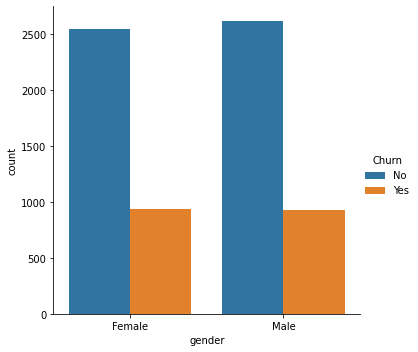

In [17]:
sns.catplot(x='gender', hue='Churn', kind="count", data=df)

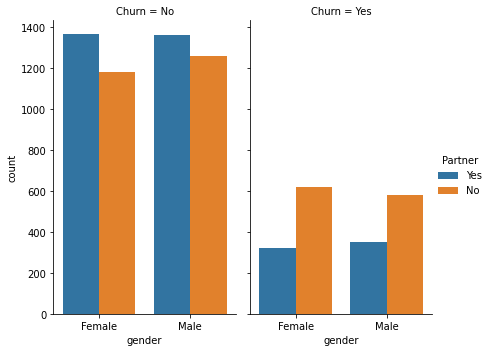

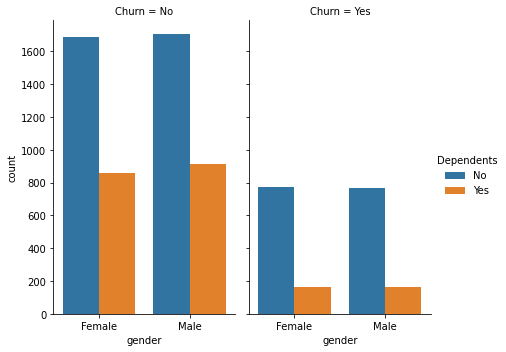

In [18]:
sns.catplot(x='gender', hue='Partner', col='Churn', aspect=.6, kind="count", data=df)
sns.catplot(x='gender', hue='Dependents', col='Churn', aspect=.6, kind="count", data=df)

In [19]:
contr_month = df[df['Contract']=='Month-to-month']
contr_year = df[df['Contract']=='One year']
contr_years = df[df['Contract']=='Two year']


In [20]:
from plotly.subplots import make_subplots

fig1 = make_subplots(rows=1, cols=3, x_title="Tenure", y_title="Number of clients" 
                     , subplot_titles=('Month to Month Contract','One Year Contract','Two Year Contract'))
# trace3 = go.Histogram(x=contr_month['tenure'], y=contr_month['tenure'].value_counts())
# trace4 = go.Histogram(x=contr_year['tenure'], y=contr_year['tenure'].value_counts())
# trace5 = go.Histogram(x=contr_years['tenure'], y=contr_years['tenure'].value_counts())

trace3 = go.Histogram(histfunc="count",x=contr_month['tenure'],y=contr_month['tenure'], name="Months'_contract_tenure")
trace4 = go.Histogram(histfunc="count",x=contr_year['tenure'],y=contr_year['tenure'], name="1 Year's_contract_tenure")
trace5 = go.Histogram(histfunc="count",x=contr_years['tenure'],y=contr_years['tenure'], name="2 Years'_contract_tenure")

fig1.add_trace(trace3, 1,1)
fig1.add_trace(trace4, 1,2)
fig1.add_trace(trace5, 1,3)

# fig1.update_layout(barmode='group')

fig1.show()

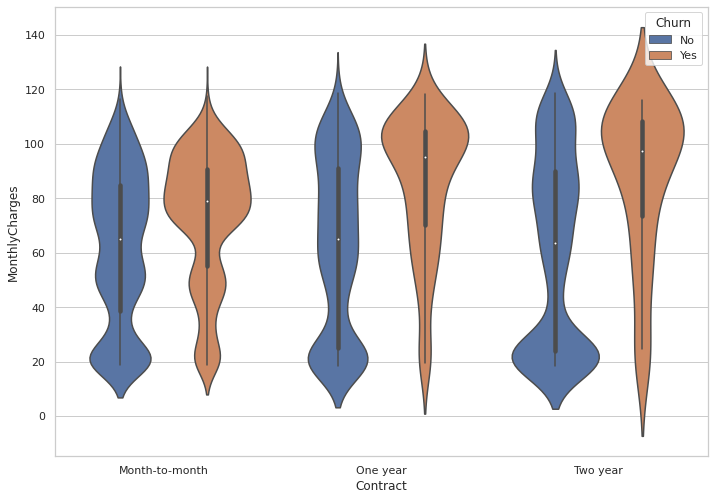

In [21]:
sns.set(rc={'figure.figsize':(11.7,8.27)},style="whitegrid")
sns.violinplot(x='Contract', y='MonthlyCharges', hue='Churn', data=df)

Text(0, 0.5, 'Probability Density')

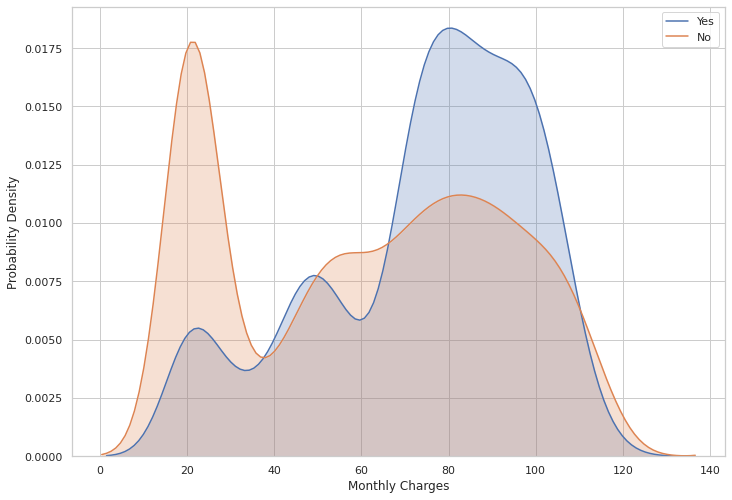

In [22]:
ax = sns.kdeplot(churn.MonthlyCharges, shade=True, label='Yes')
sns.kdeplot(no_churn.MonthlyCharges, ax=ax, shade=True, label='No')
plt.xlabel('Monthly Charges') 
plt.ylabel('Probability Density') 

## **Data preprocessing**

In [23]:
cols_2 = df.nunique()[df.nunique() == 2].keys().tolist()
del cols_2[0:2]
data = df.drop('customerID', axis=1)
for i in cols_2:
    data[i] = data[i].replace({'Yes' : 1, 'No' : 0})
data['gender'] = data['gender'].replace({'Male' : 1, 'Female' : 0})

In [ ]:
dum_col = ['InternetService','Contract','PaymentMethod']
dum_df = pd.get_dummies(data, columns=dum_col, prefix=["Internet_is", "Contract_is", "Payment_is"])
data = data.merge(dum_df)
data.drop(dum_col, axis=1, inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
data[['tenure', 'MonthlyCharges', 'TotalCharges']] = mms.fit_transform(data[['tenure', 'MonthlyCharges', 'TotalCharges']])

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split

X = data.drop('Churn', axis=1)
Y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=11)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_ros_train, y_ros_train = oversample.fit_sample(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



In [ ]:
print(X_ros_train.shape, y_ros_train.shape)

(7340, 26) (7340,)


In [ ]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, criterion = "entropy", oob_score = True, n_jobs = -1)
rf_ros = RandomForestClassifier(n_estimators=1000, criterion = "entropy", oob_score = True, n_jobs = -1)

rf.fit(X_train, y_train)
rf_ros.fit(X_ros_train, y_ros_train)
# Make predictions
rf_pred = rf.predict(X_test)
rf_ros_pred = rf_ros.predict(X_test)

print (metrics.accuracy_score(y_test, rf_pred), '\nOversampled data :', metrics.accuracy_score(y_test, rf_ros_pred))

0.7930711610486891 
Oversampled data : 0.7823033707865169


In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log_ros = LogisticRegression()

log.fit(X_train, y_train)
log_ros.fit(X_ros_train, y_ros_train)
# Make predictions
log_pred = log.predict(X_test)
log_ros_pred = log_ros.predict(X_test)

print (metrics.accuracy_score(y_test, log_pred), '\nOversampled data :', metrics.accuracy_score(y_test, log_ros_pred))

0.8038389513108615 
Oversampled data : 0.7612359550561798
